# Time Series Forecasting: Application of Regression

A time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data.

In this course you seen various data till date. A time series dataset is different. Time series adds an explicit order dependence between observations: a time dimension. This additional dimension is both a constraint and a structure that provides a source of additional information.

Time series forecasting is the use of a model to predict future values of a time series based on previously observed values.  In order to do that, first one needs to understand or model the stochastic mechanisms that gives rise to an observed series. Then this model can be used to predict or forecast the future values of a series based on the history of that series.

## Modelling timeseries forecasting as a machine learning regression task

Assume we have a timeseries: $x_1, x_2, x_3, \ldots, x_N$

We have observed $T$ values, and wish to predict future $T'$ values. We want to model the relation:
$$ \underbrace{(x_{T+1}, x_{T+2}, \ldots, x_{T+T'})}_{T'\text{ is forecast horizon}} = r(\underbrace{x_1, x_2, \ldots, x_T}_{T\text{ is history}}) $$

$T$ is called *history* and $T'$ is called *forecast horizon*.

### Constructing a regression matrix

Standard approach is to consider a moving window over the timeseries to construct following matrix:
$$ X = \overbrace{\begin{bmatrix}
       x_1 & x_2 & \dots & x_T \\           
       x_2 & x_3 & \dots & x_{T+1} \\ 
       \vdots & \vdots & \ddots & \vdots \\
       x_{N-T-T'+1} & x_{N-T-T'+2} & \dots & x_{N-T'}
       \end{bmatrix}}^{input}
    \quad
   Y = \overbrace{\begin{bmatrix}
       x_{T+1} & x_{T+2} & \dots & x_{T+T'} \\           
       x_{T+2} & x_{T+3} & \dots & x_{T+T'+1} \\ 
       \vdots & \vdots & \ddots & \vdots \\
       x_{N-T'+1} & x_{N-T'+2} & \dots & x_{N}
       \end{bmatrix}}^{output}
$$

**We will learn the *muti-input multi-output (MIMO)* regression relation: $Y = r(X)$**

## Objective
Objectives of this notebook are:
1. Converting a time series into a regression matrix using Python Pandas library.
2. Visualization of time series data.
3. Forecasting time series data by using Python Scikit Learn Regression modules.

For questions, comments and suggestions, please contact parantapa[dot]goswami[at]viseo[dot]com

## Import basic libraries
Initially we require:
1. pandas: to store data efficiently
2. numpy: to matrix operations
3. matplotlib.pyplot: for data visualization

In [1]:
# Write code to import required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

# For visualzing plots in this notebook
%matplotlib inline

## Polish Weather Data

Polish Weather dataset contains 7 weather related measurements in the Warshaw area, taken between 1999 and 2004. The readings are taken daily.

### Importing the data
The data is provided in the file **`weatherdata.csv`**. Use `read_csv()` module from pandas to import the data.

In [91]:
# We start by importing the data using pandas
# Hint 1: use "read_csv" method, Note that comma (",") is the field separator
# Hint 2: this data file already includes a header
weather = pd.read_csv("weatherdata.csv", sep=",") 

# We sneak peek into the data
# Hint: use dataframe "head" method with "n" parameter
weather.head(n=5) 

,Date,MaxTemp,MinTemp,Precipitation,Wind,RelativeHumidity,Solar
0,1/1/1999,1.415,-1.450,0.085831,3.997154,0.829051,2.906607
1,1/2/1999,1.173,-1.301,0.209427,3.214572,0.887717,1.401356
2,1/3/1999,1.917,-0.437,0.724411,2.831413,0.964532,0.720900
3,1/4/1999,2.154,0.376,0.727844,3.179892,0.960443,0.854831
4,1/5/1999,9.606,2.250,2.554322,5.794692,0.956723,0.537300


### Univariate time series forecasting
For the sake of simplicity, we will use only **MaxTemp** variable to perform time series forecasting.

Also, we are not interested in the exact time here, but the sequence itself. We ignore the "Date", still the indices of the dataframe preserves the order. So, the index values will be considered as time stamps. This will satisfy our requirement and simplify the problem.

For this exercise create a new dataframe from the "MaxTemp" column.

In [92]:
# Write code to create a new dataframe from weather
# Hint: call "pandas.DataFrame" and pass the desired column of weather
temperature = pd.DataFrame(weather["MaxTemp"]) 

# To check if all is good
temperature.head()

,MaxTemp
0,1.415
1,1.173
2,1.917
3,2.154
4,9.606


### Visualization

A time series is always dependent on time. So, implicitly here we have two variables, `time` and the "MaxTemp". You can use `DataFrame.plot.line()` to create a line plot of the time series. Indices will serve as time stamps. 

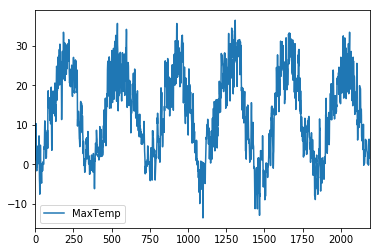

In [95]:
# Write code to generate a line plot of temperature
# Hint: use "DataFrame.plot.line()" on our dataframe temperature
temperature.plot.line() 

## Handling time series with Python Pandas

Python Pandas library is an efficient tool to work with time series data. Please see [this link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html) for all the detailed functionalities.

### Pandas `shift()` method
A key method to help transform time series data into a supervised learning problem is the Pandas [**`DataFrame.shift()`**](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shift.html) method. Given a DataFrame, the `shift()` method can be used to create copies of columns that are pushed forward or pulled back.

This is the behavior required to create columns of lag observations as well as columns of forecast observations for a time series dataset in a supervised learning format.

**Notes**:
1. `shift()` takes a positive integer $k$ to push forward the data $k$ steps (rows of NaN values added to the front)
2. `shift()` takes a positive integer $-k$ to pull back the data $k$ steps (rows of NaN values added to the end)

In [96]:
# Write code to try "shift()" method to push forward the data 1 step
# Hint: use head() at the end of youe code to see first lines
temperature.shift(1).head() 

,MaxTemp
0,NaN
1,1.415
2,1.173
3,1.917
4,2.154


In [97]:
# Write code to try "shift()" method to pull back the data 1 step
# Hint: use head() at the end of youe code to see first lines
temperature.shift(-1).head() 

,MaxTemp
0,1.173
1,1.917
2,2.154
3,9.606
4,10.347


**Checkpoint**: Make sure you understand how `shift()` works.

### Creating the Regression Matrix
Now you will use `shift()` multiple times to create a regression matrix from the `temperature` dataframe.

**Step 1**: Create a new empty DataFrame to store the regression matrix.

In [98]:
# Write code to create an empty DataFrame
# Hint: "pandas.DataFrame()" without any arguments creates an empty DataFrame
reg_mat = pd.DataFrame() 

**Step 2**: Assume the history $T = 5$. So, you have to use `shift()` five times. Each such shift will generate a new column of the regression matrix.

Note that you have to maintain the order as shown in the above equations. If we assume that "t" is the current time, the history columns of the regression matrix should be in the following order:
$$t-4, t-3, t-2, t-1, t$$

To get the "t-i" column, the time series needs to get **pushed forward i steps**. For each shift, you should store the newly generated column in the `reg_mat` dataframe with column name "t-i"

In [100]:
# Write code to generate columns t-4, t-3, t-2, t-1, t IN THIS ORDER for reg_mat
# Hint: you do not need any shift to store the column "t"
reg_mat["t-4"] = temperature.shift(4) 
reg_mat["t-3"] = temperature.shift(3) 
reg_mat["t-2"] = temperature.shift(2) 
reg_mat["t-1"] = temperature.shift(1) 
reg_mat["t"] = temperature 

# To check if all is good
reg_mat.head(10)

,t-4,t-3,t-2,t-1,t
0,NaN,NaN,NaN,NaN,1.415
1,NaN,NaN,NaN,1.415,1.173
2,NaN,NaN,1.415,1.173,1.917
3,NaN,1.415,1.173,1.917,2.154
4,1.415,1.173,1.917,2.154,9.606
5,1.173,1.917,2.154,9.606,10.347
6,1.917,2.154,9.606,10.347,8.263


**Observe** how the NaN values are added.

**Step 3**: Assume horizon $T' = 2$. This time you have to use `shift()` 2 times in the **other direction**. Again you need to maintain the order. This time the generated columns will be "t+1" and "t+2". The final ordering of columns of the entire regression matrix should be:
$$t-4, t-3, t-2, t-1, t, t+1, t+2$$

To get the "t+i" column, the time series needs to get **pulled back i steps**. For each shift, you should store the newly generated column in the `reg_mat` dataframe with column name "t+i"

In [101]:
# Write code to generate columns t+1, t+2 IN THIS ORDER for reg_mat
reg_mat["t+1"]  = temperature.shift(-1) 
reg_mat["t+2"]  = temperature.shift(-2) 

# To check if all is good
reg_mat.head(10)

,t-4,t-3,t-2,t-1,t,t+1,t+2
0,NaN,NaN,NaN,NaN,1.415,1.173,1.917
1,NaN,NaN,NaN,1.415,1.173,1.917,2.154
2,NaN,NaN,1.415,1.173,1.917,2.154,9.606
3,NaN,1.415,1.173,1.917,2.154,9.606,10.347
4,1.415,1.173,1.917,2.154,9.606,10.347,8.263
5,1.173,1.917,2.154,9.606,10.347,8.263,4.510
6,1.917,2.154,9.606,10.347,8.263,4.510,1.495


#### Using a loop

Above approach works for a small and known history and horizon. To make it automatic, use a `for` loop.

**Notes**:
1. While generating the history columns, you have to run the loop backward. As in our above example of history $T = 5$, the loop should run for i = 4 down to i = 1.
2. The column "t" is the original time series itself.
3. While generating the forecast/future columns, the loop should run as usual. As in our exmple of horizon $T' = 2$, the loop should run for i = 1 to i = 2.

Use python `range()` method wisely to control the loops. Also you have to generate the column names dynamically. Carefully choose the positive or negative values for `shift()` methods.*

In [108]:
history = 5
horizon = 2

# STEP 1: Create an empty DataFrame
reg_mat = pd.DataFrame() 

# STEP 2: For loop to generate the history columns
# Hint 1: use "reversed()" method to reverse the output of "range()" method
# Hint 2: generate column names by adding loop variable i with string "t-"
for i in reversed(range(history)): 
    column_name = "t-" + str(i) 
    reg_mat[column_name] = temperature.shift(i) 
    
# Generating the column "t"  
reg_mat["t"] = temperature

# STEP 3: For loop to generate the forecast/future columns
# Hint: generate column names by adding loop variable i with string "t+"
for i in range(1, horizon+1): 
    column_name = "t+" + str(i) 
    reg_mat[column_name] = temperature.shift(-i) 

# To check if all is good
reg_mat.head(10)

,t-4,t-3,t-2,t-1,t-0,t,t+1,t+2
0,NaN,NaN,NaN,NaN,1.415,1.415,1.173,1.917
1,NaN,NaN,NaN,1.415,1.173,1.173,1.917,2.154
2,NaN,NaN,1.415,1.173,1.917,1.917,2.154,9.606
3,NaN,1.415,1.173,1.917,2.154,2.154,9.606,10.347
4,1.415,1.173,1.917,2.154,9.606,9.606,10.347,8.263
5,1.173,1.917,2.154,9.606,10.347,10.347,8.263,4.510
6,1.917,2.154,9.606,10.347,8.263,8.263,4.510,1.495
7,2.154,9.606,10.347,8.263,4.510,4.510,1.495,-0.816
8,9.606,10.347,8.263,4.510,1.495,1.495,-0.816,-1.615
9,10.347,8.263,4.510,1.495,-0.816,-0.816,-1.615,1.448


#### Handling NaN values

We will ignore the rows containing NaN values. Use [**`DataFrame.dropna()`**](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.dropna.html) method to do this.

You have to reset indices using `DataFrame.reset_index()` method. By setting the attribute `drop` True, it overwrites the old indices. 

In both the above methods, by setting `inplace` to True, the index reset is done on the dataframe itself, without returning anything.

In [111]:
# Write code to drop rows with NaN values from reg_mat inplace
reg_mat.dropna(inplace=True) 

# Write code to reset index of reg_mat inplace, with dropping old indices
reg_mat.reset_index(drop=True, inplace=True) 

# To check if all is good
reg_mat.head(10)

,t-4,t-3,t-2,t-1,t-0,t,t+1,t+2
0,1.415,1.173,1.917,2.154,9.606,9.606,10.347,8.263
1,1.173,1.917,2.154,9.606,10.347,10.347,8.263,4.510
2,1.917,2.154,9.606,10.347,8.263,8.263,4.510,1.495
3,2.154,9.606,10.347,8.263,4.510,4.510,1.495,-0.816
4,9.606,10.347,8.263,4.510,1.495,1.495,-0.816,-1.615
5,10.347,8.263,4.510,1.495,-0.816,-0.816,-1.615,1.448
6,8.263,4.510,1.495,-0.816,-1.615,-1.615,1.448,-0.699
7,4.510,1.495,-0.816,-1.615,1.448,1.448,-0.699,1.091
8,1.495,-0.816,-1.615,1.448,-0.699,-0.699,1.091,1.526
9,-0.816,-1.615,1.448,-0.699,1.091,1.091,1.526,3.067


#### To numpy matrices

All machine learning algorithm implementations work efficiently with numpy matrices and arrays. The current format of our data is panda dataframes. Fortunately, pandas provides [**`DataFrame.as_matrix()`**](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.as_matrix.html) method to convert dataframes to numpy arrays.

In [116]:
# Write code to convert entire reg_mat into a numpy matrix
reg_mat_numpy = reg_mat.as_matrix() 

Our goal is to model time series forecasting as a machine learning regression task. It is time to identify the inputs and outputs

**Question**: What is your input **`X`** here? What is your output **`y`** here?

In [118]:
# Write code to cerate input matrix X by selecting correct columns of reg_mat_numpy
# Hint: first k columns of a numpy matrix M can be selected by M[:,:k]
X = reg_mat_numpy[:, :history] 

# Write code to cerate output matrix y by selecting correct columns of reg_mat_numpy
# Hint: last k columns of a numpy matrix M can be selected by M[:,-k:]
y = reg_mat_numpy[:, -horizon:] 

#### Putting all together

To organize everything together and to reuse later, define a method **`regression_matrix`**. This method should accept a dataframe having only one feature, history and horizon. It should then convert the dataframe into two regression matrices, input X and output y.

In [130]:
# Write a function to put everything together

# TO DELETE
def regression_matrix(df, history, horizon):
    reg_mat = pd.DataFrame() 

    for i in reversed(range(history)):
        column_name = "t-" + str(i) 
        reg_mat[column_name] = temperature.shift(i) 
    
    reg_mat["t"] = temperature

    for i in range(1, horizon+1): 
        column_name = "t+" + str(i) 
        reg_mat[column_name] = temperature.shift(-i) 
        
    reg_mat.dropna(inplace=True)
    reg_mat.reset_index(drop=True, inplace=True)
    
    reg_mat_numpy = reg_mat.as_matrix()
    
    X = reg_mat_numpy[:, :history]
    y = reg_mat_numpy[:, -horizon:]
    
    return X, y

## Univariate Time Series Forecasting with Linear Regression

Finally, we have all the modules necessary to train a regression model.

Forecast horizon is to be fixed in the beginning based on the requirement. We will first try to predict only 1 step in the future, that is we set **`horizon = 1`**. We will set **`history=20`**.

In [144]:
# Write code to generate X and y matrices from dataframe temperature
#     Set history to 20 and horizon to 1
# Hint: use the method "regression_matrix" you just wrote.
history, horizon = 20, 1 
X, y = regression_matrix(temperature, history, horizon) 

### Training Set and Test Set

A portion of the dataset is to be set aside to be used only for testing. Fortunately `sklearn` provides a [**`train_test_split()`**](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) module to do that. You can specify a ratio for `test_size` parameter. 

In this exercise, we will retain $20\%$ data for testing.

In [145]:
# Importing the module
from sklearn.model_selection import train_test_split

# Write code for splitting the data into train and test sets.
# Hint: use "train_test_split" on X and y, and test size should be 0.2 (20%)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2) 

### LinearRegression

Train a LinearRegression model.
1. Create an instance of `LinearRegression` of `sklearn`.
1. Use training set `X_train` and `y_train` to fit.
2. Use test set `X_test` and `y_test` to measure $R^2$ using `score` method.

In [146]:
# Write code to import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression 

lin_reg = LinearRegression() 
lin_reg.fit(X_train, y_train)

R2 = lin_reg.score(X_test, y_test) 
print("Linear Regression R2 = ", R2)

Linear Regression R2 =  0.897312222055


#### Visualizing the forecasted values

We will use native [**`matplotlib.pyplot.plot()`**](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) method to plot original `y_test` against `y_predicted`.

**Note**: X axis points are to be generated for plotting. It is simply range of integers `1...len(y_test)`. 

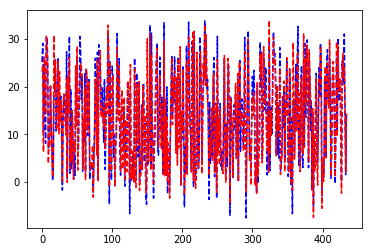

In [152]:
# Write code to predict values for test set using LinearREgression.predict() method.
y_predicted = lin_reg.predict(X_test) 

# Generating x-axis points
x_points = np.arange(y_test.shape[0])

# Write code to visualize y_test and y_predicted in a single plot
# Hint 1: use matplotlib.pyplot.plot() method
# Hint 2: choose different colors for 2 curves
plt.plot(x_points, y_test[:,0], "b--") 
plt.plot(x_points, y_predicted[:,0], "r--") 

### Multistepahead Forecasting: $T' > 1$

Let's repeat the above procedure for forecast horizon $4$, i.e. to predict values till next $4$ time stamps.

Python Scikit-Learn provides a *wrapper* module called [**`MultiOutputRegressor`**](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputRegressor.html) for multi target regression. You can pass it a standard `sklearn` regressor instance directly, which will be used as a base.

We will use it with `LinearRegression` and `RandomForestRegressor`

In [141]:
# Write code to generate X and y matrices.
#     This time set history to 20 and horizon to 4
history, horizon = 20, 4 
X, y = regression_matrix(temperature, history, horizon) 

# Write code for splitting the data into train and test sets.# TO DELETE

#### Multi target regression using LinearRegression

In [142]:
# Write code to import MultiOutputRegressor module
from sklearn.multioutput import MultiOutputRegressor 

# Write code to train a MultiOutputRegressor model using LinearRegression.
#    Test its performance on the test set
lin_reg = MultiOutputRegressor(LinearRegression()) 
lin_reg.fit(X_train, y_train) 
lin_reg_R2 = lin_reg.score(X_test, y_test) 

print("Linear Regression R2 = ", lin_reg_R2)

Linear Regression R2 =  0.834263590103


#### Multi target regression using RandomForestRegressor

In [143]:
# Write code to import necessary module for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor 

# Write code to train a MultiOutputRegressor model using RandomForestRegressor.
#    Test its performance on the test set
rfr = MultiOutputRegressor(RandomForestRegressor()) 
rfr.fit(X_train, y_train) 
rfr_R2 = rfr.score(X_test, y_test) 

print("Random Forest Regressor R2 = ", rfr_R2)

Random Forest Regressor R2 =  0.827441322834
